# Practice-0
今回は、scRNAseqの解析の一連の流れについて説明します。

# データの読み込み

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [12]:
print(sc.__version__)
print(pd.__version__)
print(np.__version__)

1.9.8
2.1.1
1.23.1


In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.23.1 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.11.4 pynndescent==0.5.11


In [3]:
# barcodes.tsv, genes.tsv, matrix.mtxがあるディレクトリを指定する
f_path = "filtered_gene_bc_matrices/hg19/"
adata = sc.read_10x_mtx(
    f_path,  # the directory with the `.mtx` file
    var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
    cache=True,  # write a cache file for faster subsequent reading
)

... reading from cache file cache/filtered_gene_bc_matrices-hg19-matrix.h5ad


/opt/conda/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


!!注意!!
再解析を行うとき落としたファイルがh5ad形式の場合には、read_h5ad()を用いてデータを読み込む

In [4]:
adata.var_names_make_unique()  
# this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [5]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

adataの構造については、practice-1を参照する

# データの前処理

In [6]:
# basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [7]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [8]:
# ミトコンドリア由来の遺伝子を発掘する
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

In [9]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

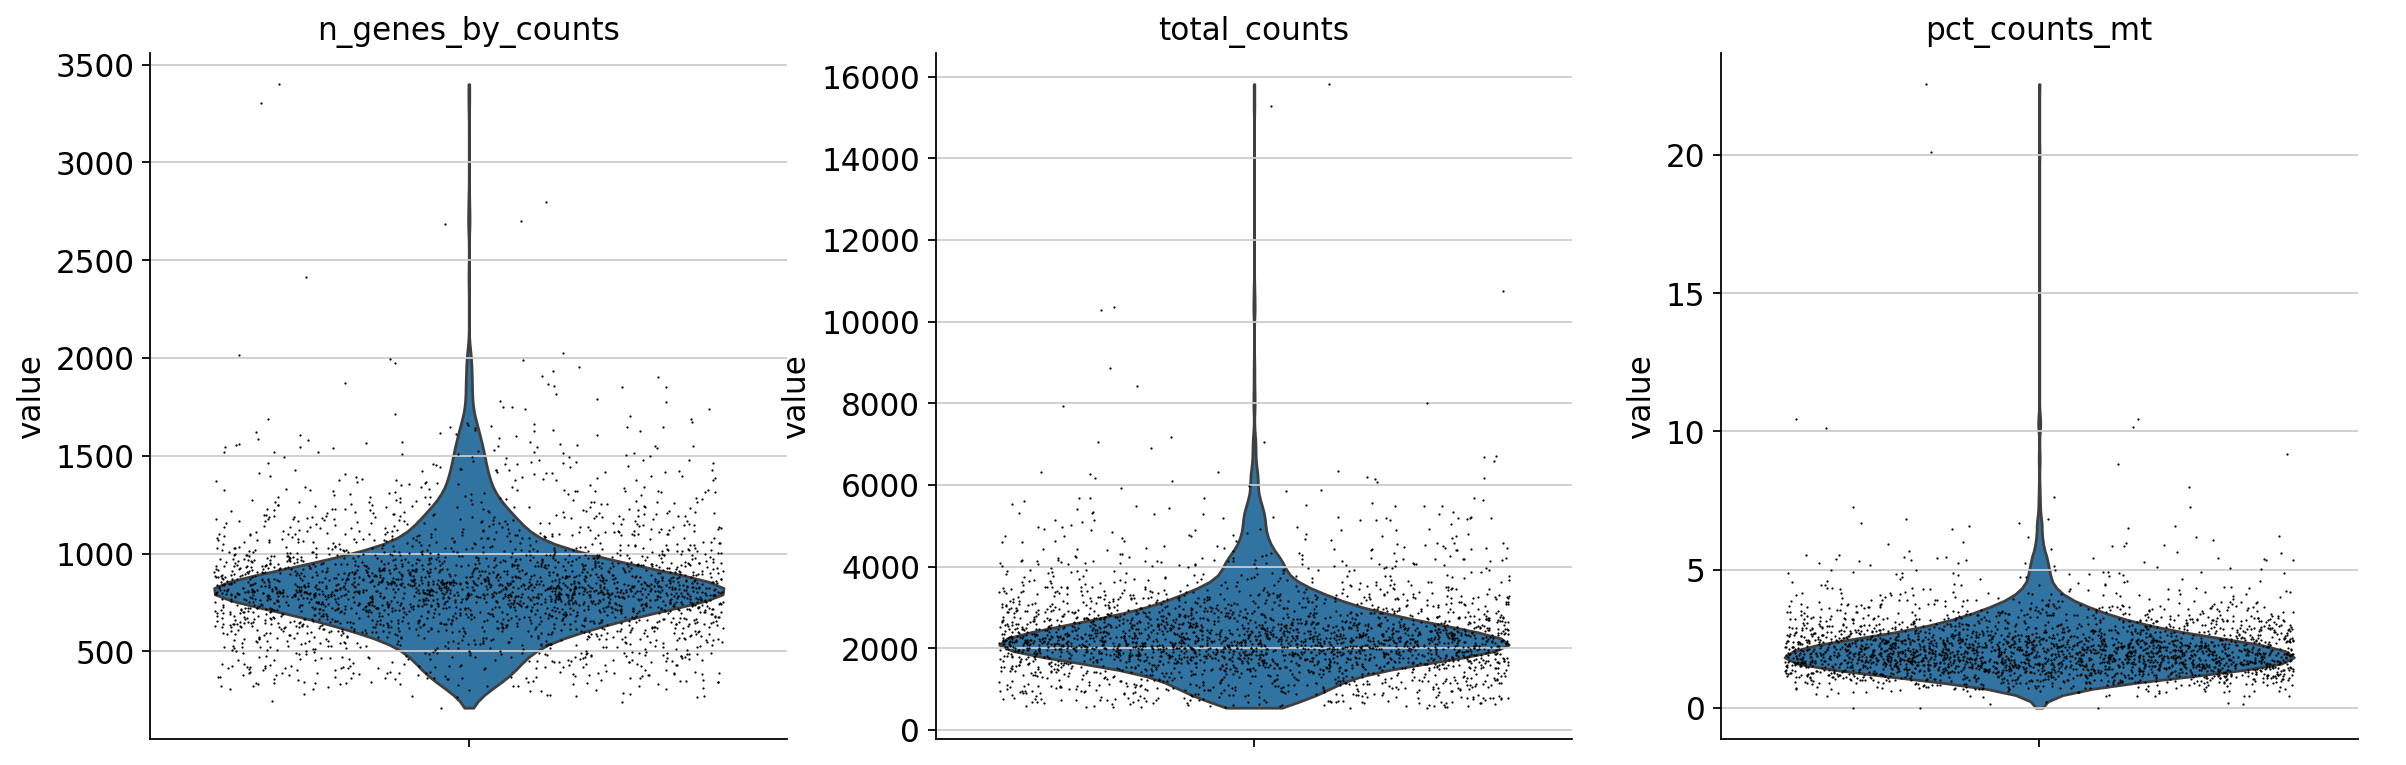

In [10]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

1.24.4
